# Natural Langugage Processing 2 

Bugün bir GSM şirketine yazılım yapıyor, Gelen mesajların gerçek tanıdığınız kişilerden mi yoksa reklam mı olduğunu anlayan yazılım

In [1]:
#spam, ham fit ve predict 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('spam.csv', encoding='iso-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
import seaborn as sns 

<Axes: xlabel='v1', ylabel='count'>

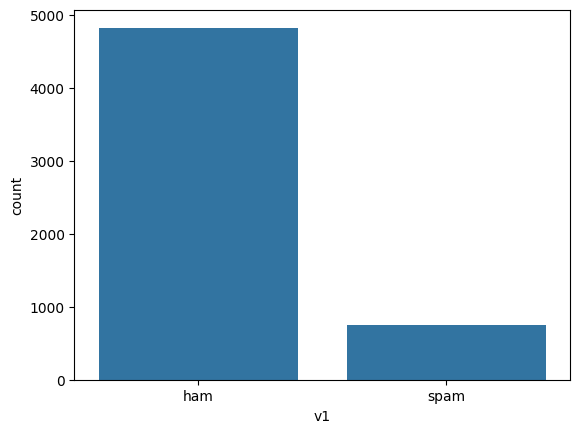

In [6]:
sns.countplot(x=df['v1'])

In [7]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns=['class', 'text'] 

In [12]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
import neattext as nfx

In [14]:
df.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['text'] = df['text'].apply(nfx.normalize) #tek satır ile yaptık

In [16]:
df.shape

(5572, 2)

In [17]:
s = ' '.join(df['text'])

In [18]:
s=nfx.clean_text(s)

In [19]:
#s

In [20]:
s = nfx.remove_emails(s)

In [21]:
#s

In [22]:
s = nfx.remove_special_characters(s)

In [23]:
#s

In [24]:
s=nfx.TextFrame(s)

In [85]:
#s

In [26]:
s.describe()

Key      Value          
Length  : 264774         
vowels  : 78171          
consonants: 138955         
stopwords: 2471           
punctuations: 0              
special_char: 0              
tokens(whitespace): 45164          
tokens(words): 45164          


In [27]:
df.shape

(5572, 2)

In [28]:
s.length

264774

In [29]:
s.head(50)

'jurong point crazy available bugis n great world l'

In [30]:
s.tail(50)

'like id interested buying week gave free rofl true'

In [31]:
s.readability()

{'automated readability': 23829.24233394195, 'description': None}

In [32]:
import nltk

In [33]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/mac/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [34]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [35]:
seyhpir=nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt') #Shakespeaer: Kimileri müslüman olduğunu söyleyebildiği, kimileri söylemedi. Ne mutlu söyleyebilenlere.

In [36]:
seyhpir=nfx.TextFrame(seyhpir)

In [37]:
seyhpir.readability()

{'automated readability': 12.990613823318782,
 'description': '18-24 years (College student)'}

In [38]:
alice=nltk.corpus.gutenberg.raw('carroll-alice.txt')

In [39]:
alice=nfx.TextFrame(alice)

In [40]:
alice.readability()

{'automated readability': 18.38055794171712, 'description': None}

In [41]:
df['text'] = df['text'].apply(nfx.normalize) #tek satır ile yaptık

<Axes: xlabel='class', ylabel='count'>

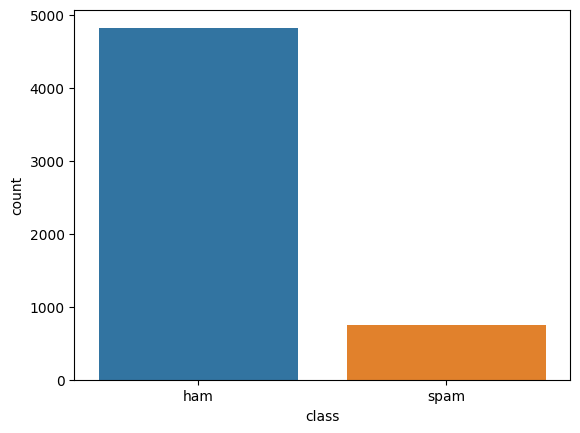

In [42]:
sns.countplot(x=df['class'],hue=df['class'])

In [43]:
#eğer data türlerinin sayısı birbirini eşit değilse. Imbalanced olur. -Çinli hikaye

In [44]:
#imbalanced SMOTE Syntetic Data - Simülasyon Datası

In [45]:
x=df['text']
y=df['class']

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer#Bir Ağaç gibi tek ve Hür, Bir orman gibi Kardeşcesine

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
#pipeline, yapılacak işleri sıralı yapar ve boyut problemini çözer

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
clf=Pipeline([('tfidf', TfidfVectorizer()),('Classifier', RandomForestClassifier())])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=42,test_size=0.20)

In [53]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [54]:
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
tahmin =clf.predict(x_test)

In [55]:
accuracy_score(tahmin, y_test)

0.9757847533632287

In [56]:
print(classification_report(tahmin, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99       992
        spam       0.82      1.00      0.90       123

    accuracy                           0.98      1115
   macro avg       0.91      0.99      0.94      1115
weighted avg       0.98      0.98      0.98      1115



In [57]:
confusion_matrix(tahmin, y_test)

array([[965,  27],
       [  0, 123]])

In [58]:
from sklearn.svm import SVC # BİR SÜRÜ MODELİ VAR BİZ CLASSİFİER MODELİNİ ALIYORUZ. SVR -> REGRESSİON İÇİN

In [59]:
svm =Pipeline([('tfidf', TfidfVectorizer()),('Classifier', SVC())])

In [60]:
svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('Classifier', SVC())])

In [61]:
tahmin2=svm.predict(x_test)

In [62]:
accuracy_score(tahmin2,y_test)

0.97847533632287

In [63]:
confusion_matrix(tahmin2,y_test)

array([[965,  24],
       [  0, 126]])

<Axes: >

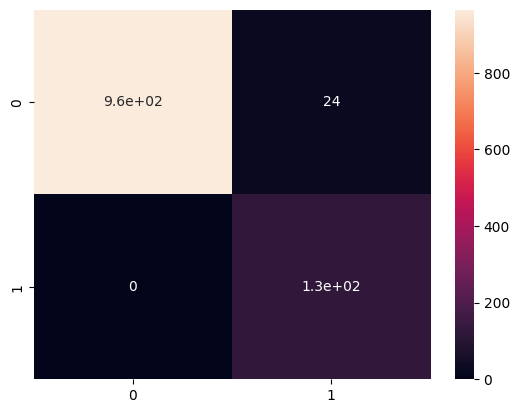

In [64]:
sns.heatmap(confusion_matrix(tahmin2,y_test), annot=True)

In [65]:
print(classification_report(tahmin2,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       989
        spam       0.84      1.00      0.91       126

    accuracy                           0.98      1115
   macro avg       0.92      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [66]:
test1=['hello, you are learning Natural Language Processing']
test2=['Congratulations, you won a lotarry ticket, to claim call 1-800-899-999']

In [67]:
test3=['Click here to claim your 1 million dollar']

In [68]:
clf.predict(test1)

array(['ham'], dtype=object)

In [69]:
clf.predict(test2)

array(['spam'], dtype=object)

In [70]:
clf.predict(test3)

array(['ham'], dtype=object)

In [71]:
# Eğitilen Modeli kaydedip kullanma

#Eğitilen Modelleri Kaydedip paylaşma

#

In [72]:
import joblib

In [73]:
joblib.dump(svm, 'svm_tm_hs.pkl')

['svm_tm_hs.pkl']

In [74]:
loaded_model=joblib.load('svm_tm_hs.pkl')

In [75]:
loaded_model.predict(test2)

array(['spam'], dtype=object)

In [77]:
#pip install wordcloud

In [86]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [95]:
def wc(data,color):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

    

In [96]:
spam=df[df['class']=='spam']
ham=df[df['class']=='spam']

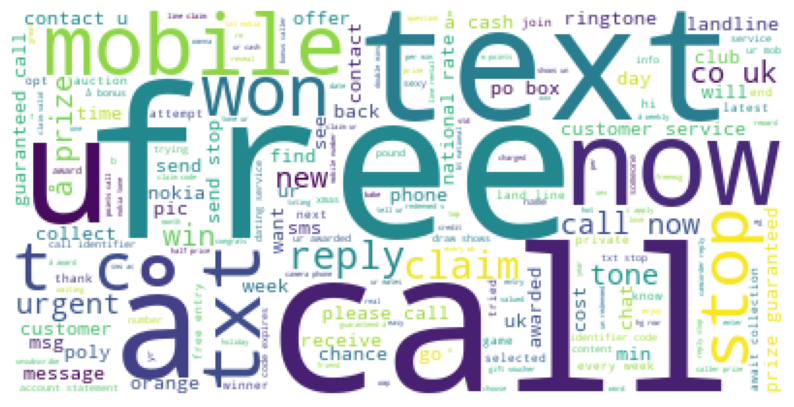

In [97]:
wc(ham['text'],'white')


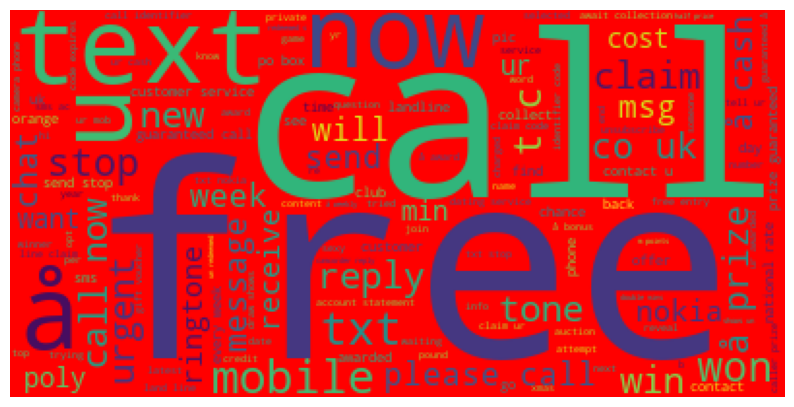

In [98]:
wc(spam['text'],'red')

In [106]:
def wc2(data):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

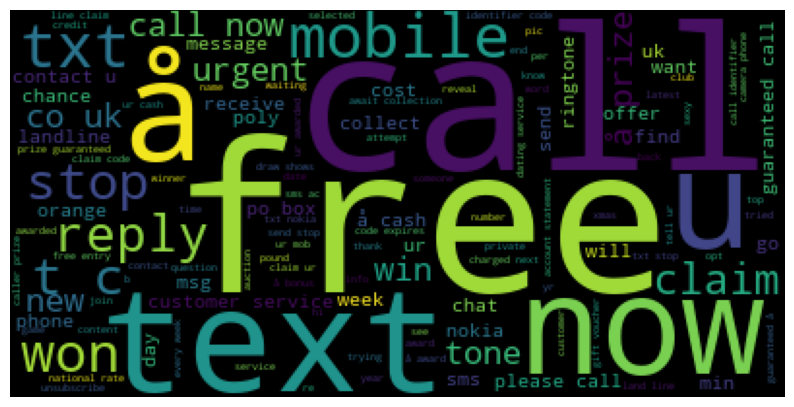

In [107]:
wc2(ham['text'])

# Sentiment Analysis

In [108]:
df['text'][2]

"free entry in  a wkly comp to win fa cup final tkts  may . text fa to  to receive entry question(std txt rate)t&c's apply 's"

In [109]:
#polarity - 1 extreme negative, 0 notr, 1 extreme positive, subjectivity: 0,1

In [110]:
text1='I love programmin and AI'

In [112]:
from textblob import TextBlob

In [113]:
blob=TextBlob(text1)

In [114]:
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [120]:
text2='Climent change is real'

In [121]:
blob=TextBlob(text2)

In [122]:
blob.sentiment.polarity

0.2

In [123]:
blob.sentiment.subjectivity

0.30000000000000004